# Cognitive Models II

- Please work in groups of two or more.

- Move chairs together and discuss as you work. No need to whisper!

- Commit and show an instructor your work before leaving.

In [61]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import *

### Categorization Review

Recall that explaining the cognitive process of categorization requires explaining both how the mind learns categories and how the mind then uses that knowledge to categorize a new stimulus. 

We examined a cognitive model called the prototype model which posits that learning a category consists of computing the average of previously seen exemplars from that category (called a prototype), and that categorization of new stimulus is based on the distance between that stimulus and each prototype.

The prototype model appeared to give decent predictions of how people categorize new stimuli, but is that enough to convince us that the mind makes use of prototypes? Another way to test this model is to test it against alternative accounts.

### From Prototypes to Memories

When people learn categories, they are also likely to remember particular exemplars from those categories (e.g., a particular cat). Thus, it's reasonable to suspect that category learning might rely on such memories.

**Exemplar Theory** posits that people learn categories by storing previously encountered exemplars from those categories. Thus, the category representation under exemplar theory is a collection of exemplars rather than a prototype. In this case, categorization of a new stimulus depends how close it is to members of existing categories.

**Exercise:** Pick either prototype or exemplar theory and make a case to your partner that it's the better theory of the two.

### Category Learning Data

We previously examined a set of stimuli (exemplars) that come from two categories, A and B. Study participants were tasked to learn which exemplars come from which category in the learning phase of an experiment. 

We'll load this data again in order to explore exemplar theory:

In [62]:
learning_stims = load_learning_phase_stimuli()
learning_stims

learning_stims

,stimulus,category,size,color
0,A1,A,0.35,0.40
1,A2,A,0.28,0.32
2,A3,A,0.40,0.45
3,A4,A,0.30,0.25
4,A5,A,0.36,0.37
5,B1,B,0.45,0.50
6,B2,B,0.38,0.58
7,B3,B,0.50,0.54
8,B4,B,0.43,0.62
9,B5,B,0.48,0.45


The first five stimuli (A1-A5) are members of category A. The second five stimuli (B1-B5) are members of category B.

Each stimulus is defined by its size (radius) and color (shade). You can think of these as the dimensions you might infer by running NMDS on similarity data for the same set of 10 shape stimuli, though some studies use the physical size and color values directly.

Let's recall what the psychological space of stimuli look like:

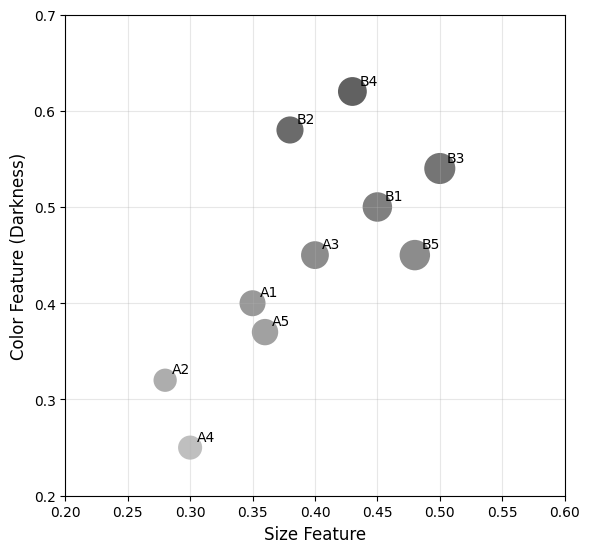

In [63]:
plot_stimuli(learning_stims)

There are multiple formalizations of exemplar theory that can be applied to this data, such as the **context model** or the **generalized context model**. We will review a simple version of the latter today. We will refer to it simply as the **exemplar model** for now.

Whereas in prototype models categories are learned by computing averages of exemplars, in the exemplar model, categories are learned by simply storing all encountered exemplars.

**Exercise:** Create a function called `store_exemplars` that takes in a dataframe like `learning_stims` and a category label and returns a numpy array (matrix) of all exemplars within that category.

In [64]:
# Your code here

def store_exemplars(df, label):
    return df[df['category'] == label].to_numpy()[:,-2:]

print(store_exemplars(learning_stims, 'A'))

[[0.35 0.4]
 [0.28 0.32]
 [0.4 0.45]
 [0.3 0.25]
 [0.36 0.37]]


In [65]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(store_exemplars(learning_stims, 'A')[1, 1], 0.32):
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise:** Store examplars from category A in `category_A_exemplars` and examplars from category B in `category_B_exemplars`.

In [66]:
# Your code here

category_A_exemplars = store_exemplars(learning_stims, 'A')
category_B_exemplars = store_exemplars(learning_stims, 'B')

In [67]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(np.mean(category_A_exemplars), 0.34800000000000003) and \
   np.isclose(np.mean(category_B_exemplars), 0.49300000000000005):
    print('Test passed')
else:
    print('Test failed')

Test passed


Recall that in the testing phase of the experiment (i.e., after phase where categories were learned), participants are shown new stimuli and asked to categorize them.

The testing phase data is loaded again below. Recall that the `categorization` column shows the categorizations of a single participant.

In [68]:
test_data = load_test_phase_data()

test_data

,stimulus,size,color,categorization
0,Test1,0.30,0.45,A
1,Test2,0.60,0.55,B
2,Test3,0.45,0.50,B
3,Test4,0.35,0.35,A
4,Test5,0.55,0.35,B
5,Test6,0.40,0.60,B
6,Test7,0.25,0.55,A
7,Test8,0.50,0.40,B
8,Test9,0.35,0.60,B


Whereas in the case of prototype models we are interested in the distances, $d(z, P_A)$ and $d(z, P_B)$, between a **new** stimulus $z$ and prototypes $P_A$ and $P_B$, in the case of exemplar models we are interested in distances $d(z, x)$ between a new stimulus $z$ and a particular exemplar $x$. We will explain how these quantities relate the full model a bit later on.

**Exercise:** Create a function called `stimulus_to_exemplar_distance` that takes in a stimulus and exemplar as two numpy arrays and returns the Euclidean distance between them.

In [69]:
# Your code here

def stimulus_to_exemplar_distance(arr1, arr2):
    return np.linalg.norm(arr2 - arr1)

In [70]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(stimulus_to_exemplar_distance(np.array([0, 0]), np.array([1, 1])), np.sqrt(2)):
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise:** Use the function above to compute the distance (called `distance`) between the first new test stimulus ("Test1") and the first exemplar of category A.

In [71]:
# Your code here
vals = test_data[test_data['stimulus'] == "Test1"].values
first_stim = [vals[-1][1],vals[-1][2]]

distance = stimulus_to_exemplar_distance(first_stim, category_A_exemplars[0])

In [72]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(distance, 0.07071067811865474):
    print('Test passed')
else:
    print('Test failed')

Test passed


As we did with the prototype model, we can convert distances to similarity using Shepard's law: $e^{-d(z, x)}$.

**Exercise:** Create a function called `stimulus_to_exemplar_similarity` that takes in a stimulus and exemplar as two numpy arrays and returns a similarity value. Make sure to reuse your `stimulus_to_exemplar_distance` function. 

In [73]:
# Your code here

def stimulus_to_exemplar_similarity(arr1, arr2):
    dist = stimulus_to_exemplar_distance(arr1, arr2)
    return np.exp(-dist)

In [74]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(stimulus_to_exemplar_similarity(np.array([0, 0]), np.array([1, 1])), 0.2431167344342142):
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise:** Use the function above to compute the similarity (called `similarity`) between the first new test stimulus ("Test1") and the first exemplar of category A.

In [75]:
# Your code here

similarity = stimulus_to_exemplar_similarity(first_stim, category_A_exemplars[0])

In [76]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(similarity, 0.9317314234233945):
    print('Test passed')
else:
    print('Test failed')

Test passed


In the prototype model, we could assign category membership by simply comparing (1) the similarity $s(z, P_A)$ of the new stimulus to prototype A to (2) the similarity $s(z, P_B)$ of the new stimulus to prototype B. That is, we assign the new stimulus to the category with higher stimulus-to-prototype similarity.

In the case of exemplar theory, we need to define what it means for a new stimulus to be "similar to a category". For example, is the similarity to the nearest exemplar within that category? Traditionally, in exemplar models, it is defined as the sum of the similarity to all exemplars within a category.

**Exercise:** Discuss with your partner why other definitions might also make for reasonable hypotheses. Which do you think is the best guess?

Formally, given the example of category A, we define this similarity as $s(z, A) = \sum_{i=1}^{n_A} e^{-d(z, x_i^A)}$ where $x_i^A$ is the $i$-th exemplar in category $A$ and $n_A$ is the number of exemplars in category $A$.

**Exercise:** Create a function called `similarity_to_category_exemplars` that takes in a stimulus as a numpy array and a set of exemplars as a numpy array (matrix) and returns e.g., $s(z, A)$.

In [77]:
# Your code here

def similarity_to_category_exemplars(arr1, exemplars):
    res = 0
    for i in range(len(exemplars)):
        res += stimulus_to_exemplar_similarity(arr1, exemplars[i])
    return res

In [78]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(similarity_to_category_exemplars(np.array([0, 0]), category_A_exemplars), 3.062497409891418):
    print('Test passed')
else:
    print('Test failed')

Test passed


We now have enough to define a basic exemplar model as:

$$\text{behavior (choose A or not)} = \text{categorize}(z) = \begin{cases} 
1 & \text{if } s(z, A) > s(z, B) \\ 
0 & \text{if } s(z, B) > s(z, A)
\end{cases}$$

**Exercise:** Create a function called `categorize` that takes in a single stimulus as a numpy array along with two sets of category exemplars (each is a matrix), and returns a category label as a string (either `"A"` or `"B"`) for convenience.

In [79]:
# Your code here

def categorize(arr, cat_a, cat_b):
    return "A" if similarity_to_category_exemplars(arr, cat_a) > similarity_to_category_exemplars(arr, cat_b) else "B"

In [80]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if categorize(np.array([0, 0]), category_A_exemplars, category_B_exemplars) == 'A':
    print('Test passed')
else:
    print('Test failed')

Test passed


We are now in a position to assess the accuracy of the exemplar model in predicting the categorizations of a single participant.

**Exercise:** Compute predicted categorizations of each of the test stimuli using the exemplar model and compare them to the empirical categorizations. Store the proportion correctly predicted in a variable called `accuracy`.

In [81]:
# Your code here

result = 0

for _, row in test_data.iterrows():
    size, color, categorization = row["size"], row["color"], row["categorization"]
    result += 1 if categorize([size, color], category_A_exemplars, category_B_exemplars) == categorization else 0

accuracy = result/len(test_data["size"])

In [82]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(accuracy, 0.8888888888888888):
    print('Test passed')
else:
    print('Test failed')

Test passed


The accuracy in predicting categorizations for this participant was ~88%. That's 9/10. Not bad!

Recall that accuracy for the prototype model was ~78%. At least for this participant, the exemplar model appears to make better predictions.

Now let's look at multiple participants. Recall that the `prop_chose_A` column in `test_props` below gives the proportion that multiple participants chose A over B. The task of our model is to predict these proportions.

In [83]:
test_props = load_test_phase_data(with_proportions=True)
test_props

,stimulus,size,color,prop_chose_A
0,Test1,0.30,0.45,0.85
1,Test2,0.60,0.55,0.10
2,Test3,0.45,0.50,0.40
3,Test4,0.35,0.35,0.70
4,Test5,0.55,0.35,0.15
5,Test6,0.40,0.60,0.30
6,Test7,0.25,0.55,0.60
7,Test8,0.50,0.40,0.25
8,Test9,0.35,0.60,0.50


**Exercise:** Think back to the similarity-choice rule from the previous lab. Use this rule to create a function called `categorize_prob` that takes in a single stimulus as a numpy array along with two sets of category exemplars (each is a matrix), and returns the probability $P(\text{categorize } z \text{ as A})$ of assigning category A to the single stimulus $z$.

In [84]:
# Your code here

def categorize_prob(stim, cat_a, cat_b):
    sim_a = similarity_to_category_exemplars(stim, cat_a)
    sim_b = similarity_to_category_exemplars(stim, cat_b)
    return sim_a / (sim_a + sim_b)

In [85]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(categorize_prob(np.array([0, 0]), category_A_exemplars, category_B_exemplars), 0.5528057658479283):
    print('Test passed')
else:
    print('Test failed')

Test passed


Now let's apply this function to get predictions for all test stimuli.

**Exercise:** Compute $P(\text{categorize } z \text{ as A})$ for all test stimuli and store the result in a numpy array called `predictions`. Also store the empirical proportions in an array called `empirical`.

In [86]:
# Your code here

predictions = []

for _, row in test_data.iterrows():
    size, color = row["size"], row["color"]
    predictions.append(categorize_prob(np.array([size,color]), category_A_exemplars, category_B_exemplars))
    
empirical = test_props['prop_chose_A'].values

In [87]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(np.mean(predictions), 0.4891573776875513) and \
   np.isclose(np.mean(empirical), 0.42777777777777776):
    print('Test passed')
else:
    print('Test failed')

Test passed


We compare the predicted proportions of the model with the empirical proportions using a measure of error such as mean squared error (i.e., mean squared difference). Lower values / errors indicate better correpondence between the predicted and empirical proportions.

**Exercise:** Create a function called `mse` that takes in an array of predicted proportions and an array of empirical proportions and returns the mean squared error.

In [88]:
# Your code here

def mse(predicted, empirical):
    error = predicted - empirical
    return np.mean(np.pow(error, 2))

In [89]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(mse(np.array([1, 2, 3]), np.array([1, 2, 3])), 0.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's look at the MSE for our current set of predictions:

In [90]:
mse(predictions, empirical)

np.float64(0.054497886581867466)

To understand whether or not this error is a good value or not, let's manually compare the empirical and predicted proportions: 

In [91]:
print(empirical)
print(predictions)

[0.85 0.1  0.4  0.7  0.15 0.3  0.6  0.25 0.5 ]
[np.float64(0.5162322241627367), np.float64(0.45991345457682087), np.float64(0.4726162970527469), np.float64(0.5362504731353684), np.float64(0.4977417996774857), np.float64(0.4606513748293824), np.float64(0.4963265897826771), np.float64(0.4930107455238622), np.float64(0.46967344044688136)]


Notice that the predictions are all close to 0.5. The first prediction is still correct in some sense, since both .85 and .51 favor category A, but the exact proportion isn't much like people. This is an issue since we want our predicted proportions to match the degree to which people think an exemplar is typical of a category.

Part of the reason for the predictions being off is simply due to the scaling of the similarities. That is, `similarity = exp(-distance)` can be thought of as `similarity = exp(-c * distance)` where `c` is (currently) 1. Implicitly, `c` scales the psychological distance before converting to similarity. Recall that we once fit this parameter early on when discussing Shepard's law.

To see why this parameter matters, let's look at some examples:

When `c = 1`:
- distance = 0.2  →  similarity = exp(-0.2) ≈ 0.82
- distance = 0.4  →  similarity = exp(-0.4) ≈ 0.67

When `c = 5`:
- distance = 0.2  →  similarity = exp(-1.0) ≈ 0.37
- distance = 0.4  →  similarity = exp(-2.0) ≈ 0.14

That is, when `c` is higher, the same distances lead to **more differentiated similarities** (0.82 - 0.67 < 0.37 - 0.14).

These more differentiated similarities in turn affect the final probabilities through the choice rule: `P(A) = sim_A / (sim_A + sim_B)`. In particular, larger values of `c` pull the probabilities away from 0.5:

When `c = 1`:
- sim_A = 0.82, sim_B = 0.67
- P(A) = 0.82 / (0.82 + 0.67) ≈ 0.55

When `c = 5`:
- sim_A = 0.37, sim_B = 0.14
- P(A) = 0.37 / (0.37 + 0.14) ≈ 0.73

The visualization below shows what happens to the predicted proportions for the test stimuli as `c` varies (values of 1, 5, 10,  and 50).

Text(0.5, 1.0, 'Probability of choosing A as a function of c')

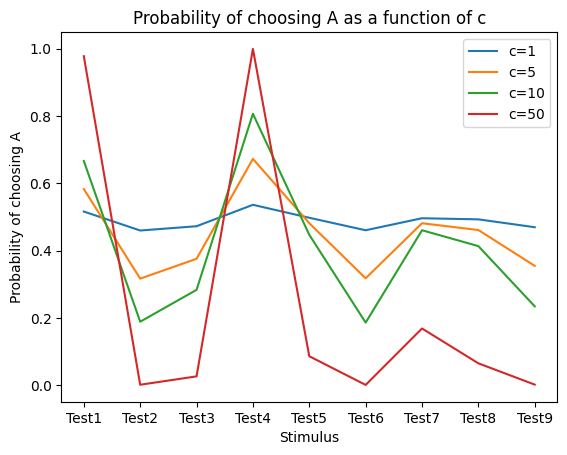

In [92]:
for c in [1, 5, 10, 50]:
    preds = predict_exemplar_props(learning_stims, test_data, c=c)
    plt.plot(preds, label=f'c={c}')
plt.xticks(range(len(test_data)), test_data['stimulus'].values)
plt.xlabel('Stimulus')
plt.ylabel('Probability of choosing A')
plt.legend()
plt.title('Probability of choosing A as a function of c')

The $c$ parameter is an example of a **model parameter** that can we vary freely. In exemplar models, this parameter is called the **sensitivity parameter**. We can adjust such parameters to better predict behavior. In doing so, it is often said that such as parameters are **"fitted to the data"**.

A preloaded function called `predict_exemplar_props` is provided that can be used to make exemplar model predictions with a given $c$ parameter using a call like: `predict_exemplar_props(learning_stims, test_data, c=1)`.

**Exercise:** Evaluate values of $c$ in the range `np.arange(1, 101, 1)`. Store the best $c$ parameter in `best_c` and the lowest MSE value in `lowest_mse`.

In [93]:
# Your code here
lowest_mse = np.inf
best_c = 0
for c in np.arange(1, 101, 1):
    predictions = predict_exemplar_props(learning_stims, test_data, c)
    current_mse = mse(predictions, empirical)
    if current_mse < lowest_mse:
        best_c = c
        lowest_mse = current_mse

In [94]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(best_c, 8) and np.isclose(lowest_mse, 0.030768310957434566):
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's look at the new lowest MSE value:

In [95]:
lowest_mse

np.float64(0.030768310957434566)

Note that this value is less than the error we computed when $c$ had been defaulted to 1.

We can also look at the new predicted proportions and see that they look better:

In [96]:
predict_exemplar_props(learning_stims, test_data, c=8)

array([0.63344651, 0.23352515, 0.31713519, 0.75886502, 0.46274454,
       0.23256291, 0.4695144 , 0.43368329, 0.27923814])

A similar parameter can be fitted in a prototype model, similarily included in the similarity calculations (i.e., to each prototype).

A preloaded function called `predict_prototype_props` is provided that can be used to make prototype model predictions with a given $c$ parameter using a call like: `predict_prototype_props(learning_stims, test_data, c=1)`.

**Exercise:** Evaluate values of $c$ in the range `np.arange(1, 101, 1)`. Store the best $c$ parameter in `best_c_pt` and the lowest MSE value in `lowest_mse_pt`.

In [97]:
# Your code here

lowest_mse_pt = np.inf
best_c_pt = 0

for c in np.arange(1, 101, 1):
    predictions = predict_prototype_props(learning_stims, test_data, c)
    current_mse = mse(predictions, empirical)
    if current_mse < lowest_mse_pt:
        best_c_pt = c
        lowest_mse_pt = current_mse

In [98]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(best_c_pt, 6) and np.isclose(lowest_mse_pt, 0.035680009623367176):
    print('Test passed')
else:
    print('Test failed')

Test passed


We can examine the best MSE for the prototype model now as well:

In [99]:
lowest_mse_pt

np.float64(0.035680009623367176)

**Exercise:** Based on the MSE scores for both models, **discuss with your partner** which model appears to better fit human categorization behavior in the data provided. Does the evidence agree with your initial prediction of the best model? Is the evidence enough to convince you that one of the models is best?

The fact that both models make decent and comparable predictions, even if one seems "better", illustrates the problem that **different mathematical models can explain the same behavior**. This is sometimes called the **identifiability problem**: which model is the right one if they both explain behavior? This apparent comparability is despite the fact that one of the models is based on abstraction (computing summary prototyptes) while the other is based on memory: two seemingly very different mechanisms. As a result, researchers try their best to create conditions that will **differentiate** two theories / models.

Researchers eventually discovered that only exemplar models can predict behavior well when categories are not as nicely clustered as in our example data above. Nonethess, comparison of these models (and many others!) is still an active area of research, and a true winner has not yet been established.

**Exercise:** Discuss with your partner an idea for your own model you could test. Could you use a different measure of central tendency than a standard prototype model? Could you use a different distance metric? Could you combine the two models somehow?